In [1]:
# Import necessary modules
import sys
import os
import torch 
# Set root folder to project root
os.chdir(os.path.dirname(os.getcwd()))

# Add root folder to path
sys.path.append(os.getcwd())

from src.utils.config import Hyperparameters
from src.utils.model_loading import load_model
from src.utils.maze_loading import load_mazes
from src.utils.testing import is_correct
from src.utils.analysis import plot_mazes

2025-05-21 19:10:56,068 - src.utils.model_loading - INFO - Loaded model: dt_net from models/dt_net/original.pth to device: cuda:1
2025-05-21 19:10:56,076 - src.utils.model_loading - INFO - Loaded model: dt_net from models/dt_net/2025-03-12_03:43:44/best.pth to device: cuda:1


2025-05-21 19:10:56,092 - src.utils.model_loading - INFO - Loaded model: it_net from models/it_net/2025-03-26_23:59:57/best.pth to device: cuda:1
2025-05-21 19:10:56,093 - src.utils.maze_loading - INFO - Attempting 3 mazes to generate 3 mazes with size: 99, percolation: 0, and deadend_start: True
2025-05-21 19:10:56,118 - src.utils.maze_loading - INFO - Loaded 3 mazes with size: 99, percolation: 0, and deadend_start: True


3 out of 3 predictions are correct.
Saving maze plots to outputs/visuals/mazes/predictions_dt_net_size-99_iters-3000


IndexError: index 1 is out of bounds for dimension 0 with size 1

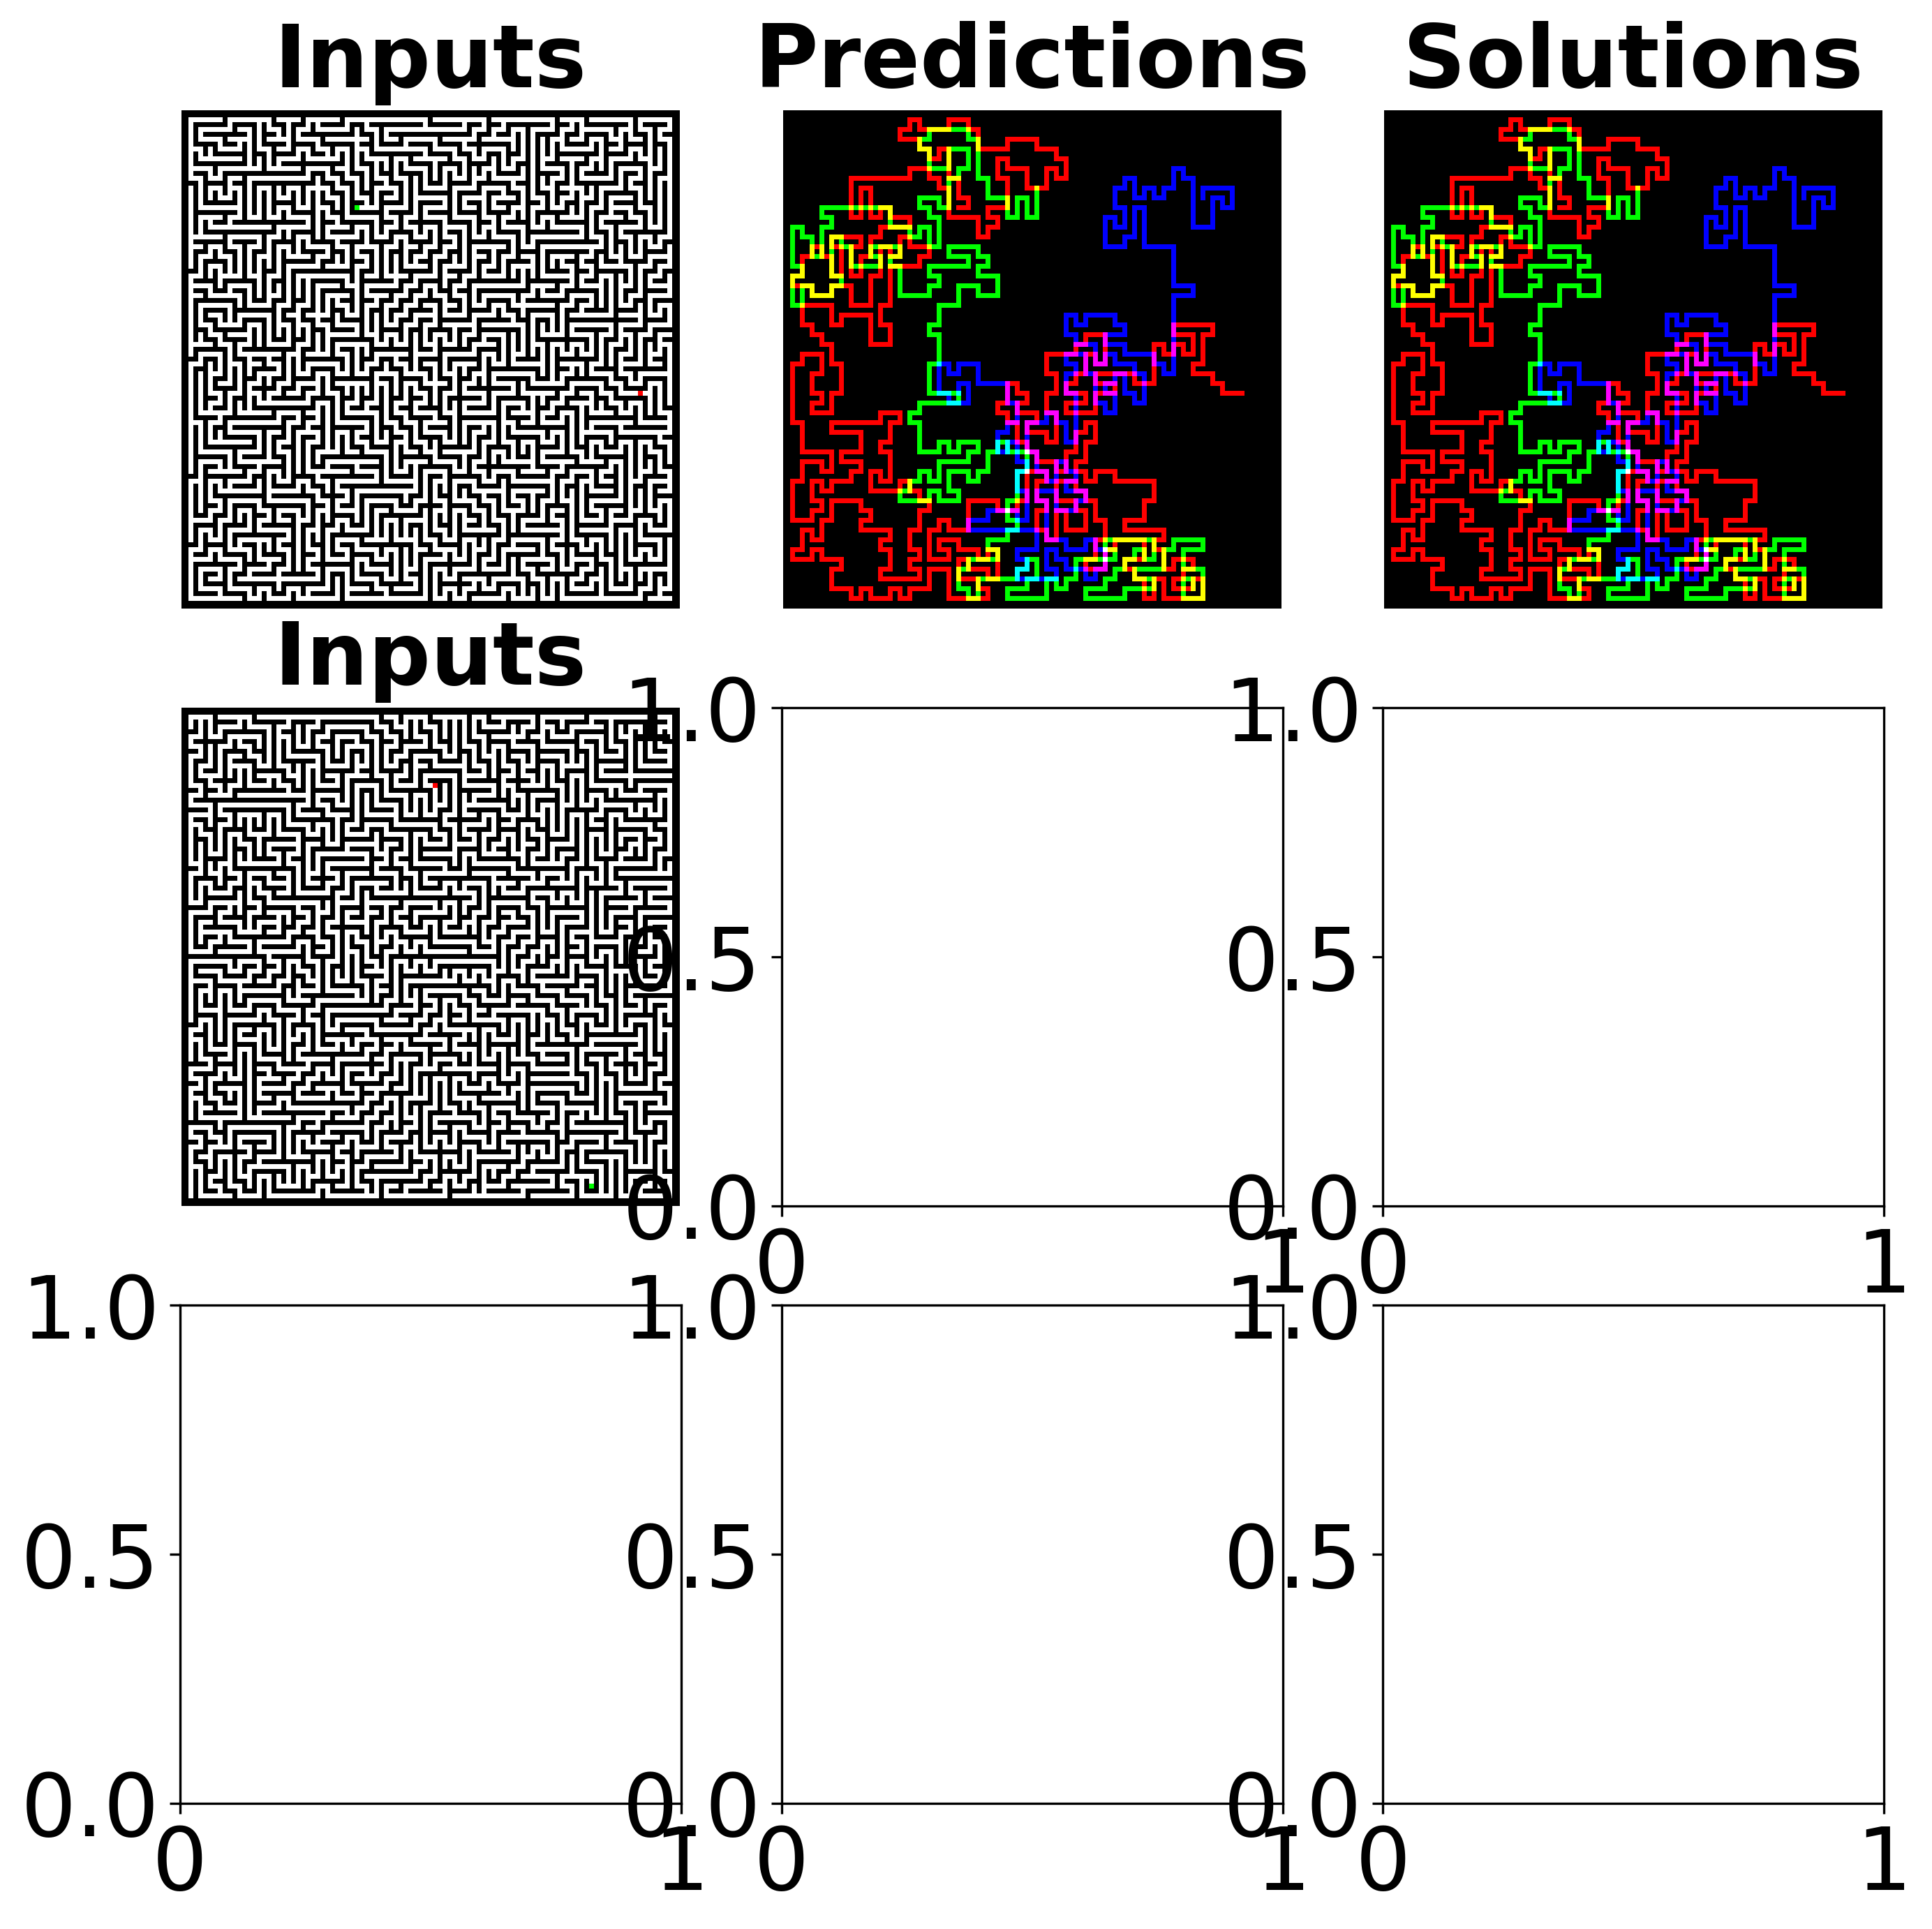

In [3]:
# Load model
dt_net_original = load_model(pretrained='models/dt_net/original.pth')
dt_net = load_model(pretrained='models/dt_net/2025-03-12_03:43:44/best.pth') # train percolation: 0.5
it_net = load_model(pretrained='models/it_net/2025-03-26_23:59:57/best.pth') # train percolation: 0.4
model = dt_net_original

# Load mazes
hyperparams = Hyperparameters()
hyperparams.iters = 3000
hyperparams.num_mazes = 3
hyperparams.percolation = 0
hyperparams.maze_size = 99
inputs, solutions = load_mazes(hyperparams)

# Predict
# predictions = model.predict(inputs, iters=hyperparams.iters)
with torch.no_grad():
    model.eval()
    latents = model.input_to_latent(inputs)
    latents = model.latent_forward(latents, inputs, iters=hyperparams.iters)
    #latents = model.latent_forward_layer(torch.cat([latents, inputs], dim=1))
    outputs = model.latent_to_output(latents)
    predictions = model.output_to_prediction(outputs, inputs)

# Evaluate predictions
corrects = is_correct(inputs, predictions, solutions)
print(f'{corrects.sum()} out of {len(corrects)} predictions are correct.')

# Plot results
file_name=f'outputs/visuals/mazes/predictions_{model.name}_size-{hyperparams.maze_size}_iters-{hyperparams.iters}'
print(f'Saving maze plots to {file_name}')
plot_mazes(
    (('Inputs', inputs),
    ('Predictions', predictions),
    ('Solutions', solutions))
)